# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**

## **Marks: 40**

---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [80]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

## debugging: plot_confusion_matrix deprecated? 
## Use sklearn.metrics.ConfusionMatrixDisplay instead?
## Documentation is here >> sklearn.metrics.ConfusionMatrixDisplay >> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# To get diferent metric scores
## from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer
## new import that works with ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, make_scorer


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [81]:
# debugging: delete before submission
import sklearn
sklearn.__version__

'1.2.1'

## **Loading the dataset**

In [82]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [83]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [84]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [85]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [86]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [88]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [89]:
data = data.drop(["Booking_ID"], axis=1)

In [90]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**

**Let's check the statistical summary of the data.**

In [91]:
# Remove _________ and complete the code
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Write your answers here:_____**

## **Exploratory Data Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [92]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Lead Time` using the hist_box function provided and write your insights. (1 Mark)**

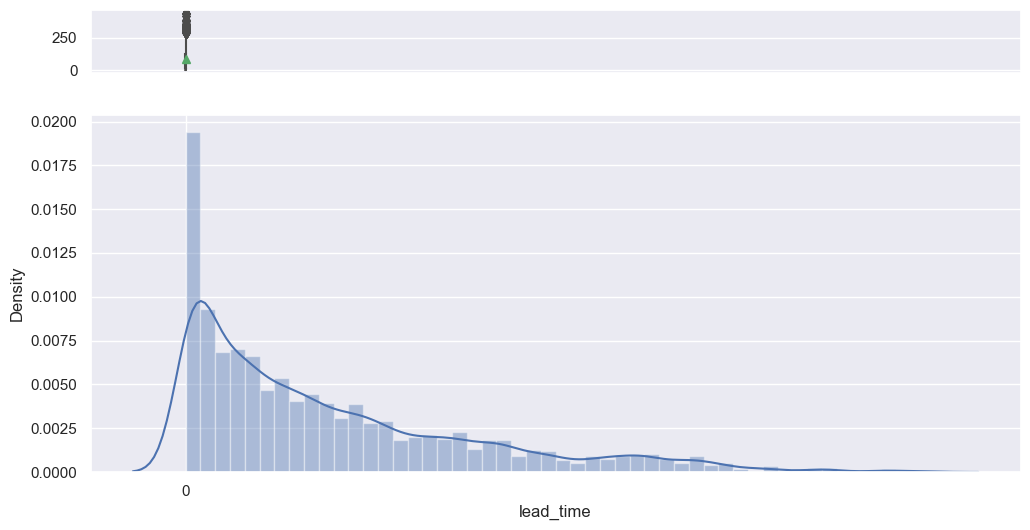

In [93]:
# Remove _________ and complete the code
hist_box(data, 'lead_time')

**Write your answers here:_____**

#### **Question 2.2:  Plot the histogram and box plot for the variable `Average Price per Room` using the hist_box function provided and write your insights. (1 Mark)**

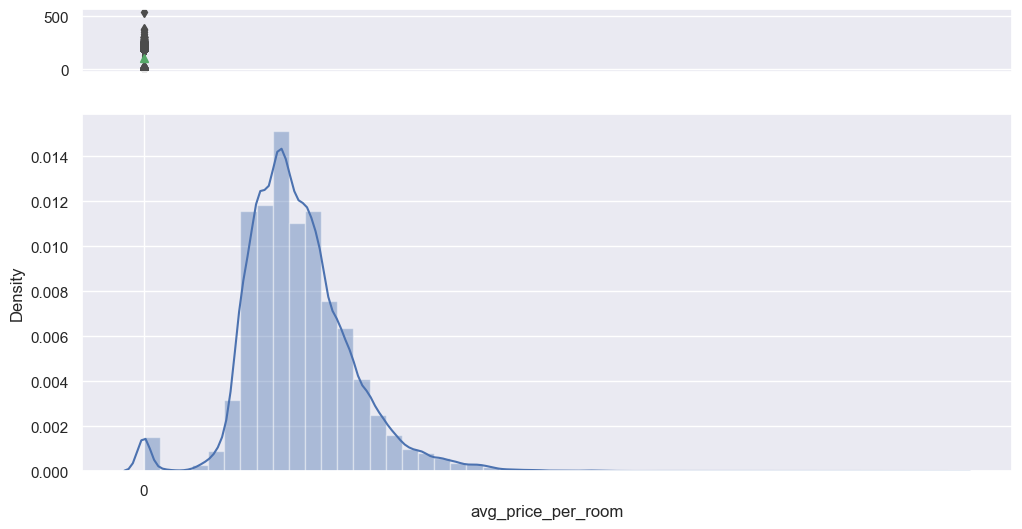

In [94]:
# Remove _________ and complete the code
hist_box(data, 'avg_price_per_room')

**Write your answers here:_____**

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [95]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [96]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [97]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [98]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

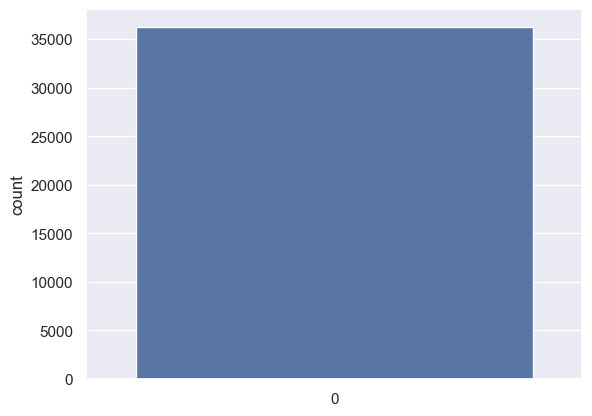

In [99]:
sns.countplot(data['no_of_children'])
plt.show()

In [100]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [101]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

In [102]:
sns.countplot(data["booking_status"])
plt.show()

ValueError: could not convert string to float: 'Not_Canceled'